<a href="https://colab.research.google.com/github/SeoJiWon1/ML-DL/blob/main/Pytorch__%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소프트맥스 함수 (Softmax function)
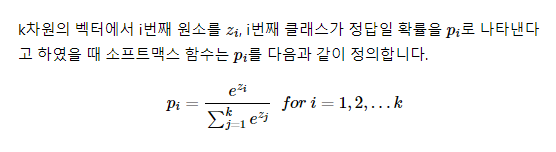
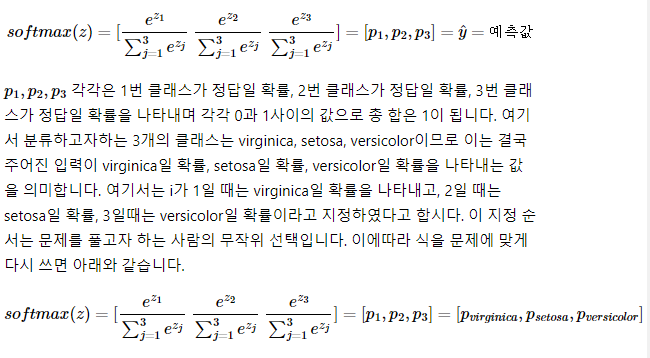

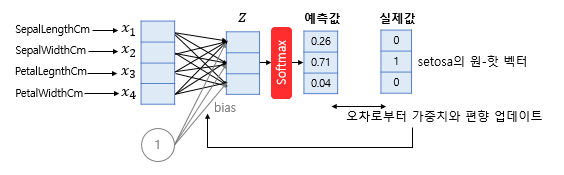

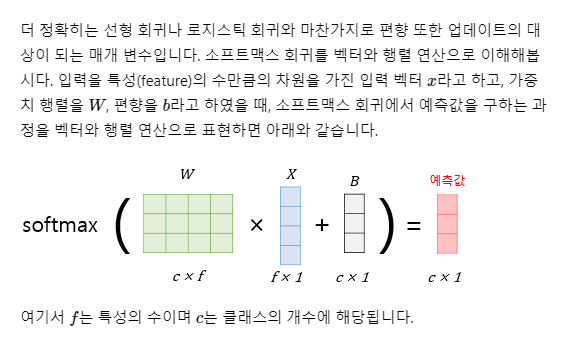

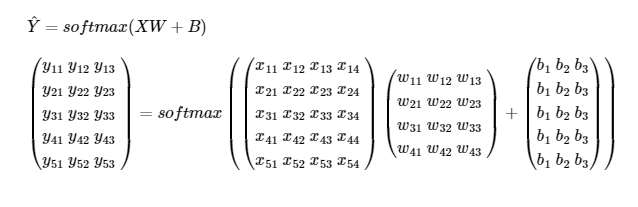

# 비용 함수(Cost function)

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용

## 1) 크로스 엔트로피 함수

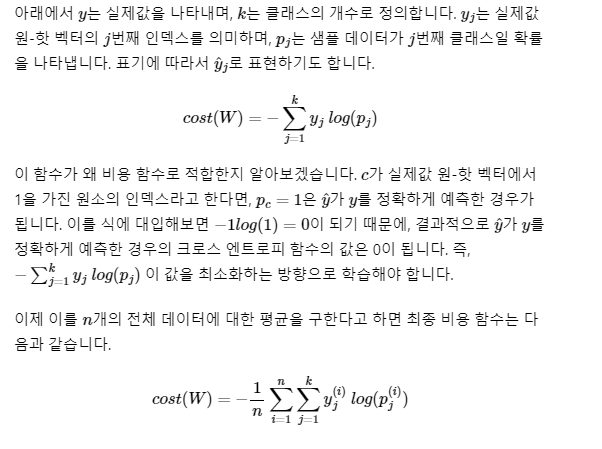

## 2) 이진 분류에서의 크로스 엔트로피 함수

## 소프트맥스 회귀의 비용 함수 구현하기

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
z = torch.FloatTensor([1, 2, 3])

In [ ]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum()

tensor(1.)

## 비용 함수 직접 구현

In [ ]:
z = torch.rand(3, 5, requires_grad=True)

소프트 맥스 함수 적용

In [ ]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


이제 각 행의 원소들의 합은 1이 되는 텐서로 변환

소프트맥스 함수의 출력값은 결국 예측값

즉, 위 텐서는 3개의 샘플에 대해서 5개의 클래스 중 어떤 클래스가 정답인지를 예측한 결과

In [ ]:
y = torch.randint(5, (3,)).long()
print(y) # 각 샘플에 대해서 임의의 레이블을 만든다.

tensor([0, 2, 1])


각 레이블에 대해서 원 - 핫 인코딩 수행

In [ ]:
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) 
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

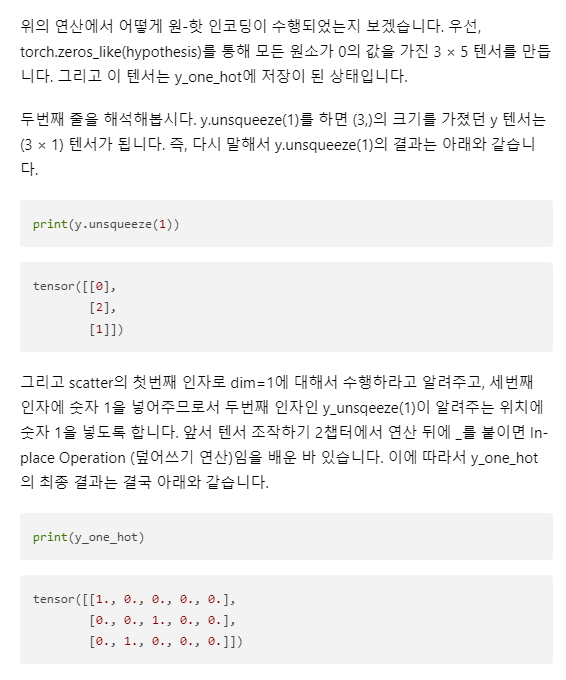

# 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

## 1. F.softmax() + torch.log() = F.log_softmax()

In [ ]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [ ]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

## F.log_softmax() + F.nll_loss() = F.cross_entropy()

In [ ]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

# 소프트맥스 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
# x_train의 각 샘플은 4개의 특성을 가지고 있으며, 총 8개의 샘플이 존재합니다. 
# y_train은 각 샘플에 대한 레이블인데, 여기서는 0, 1, 2의 값을 가지는 것으로 보아 총 3개의 클래스가 존재합니다.

In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## 소프트맥스 회귀 nn.Module로 구현하기

In [ ]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


## 소프트맥스 회귀 클래스로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class softmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
    def forward(self, x):
        return self.linear(x)

In [ ]:
model = softmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr =0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

    # H(x) 계산 
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


## 소프트맥스 회귀로 MNIST 데이터 분류하기

In [ ]:
# http://yann.lecun.com/exdb/mnist

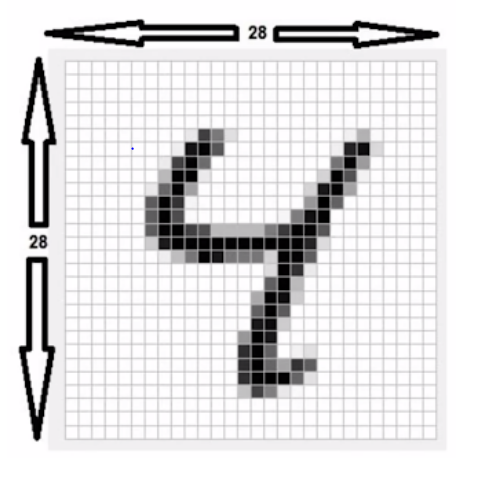

각각의 이미지는 28 x 28 = 784 픽셀

각 이미지를 총 784의 원소를 가진 벡터로 만들어줄것이다. 

이렇게 되면 총 784개의 특성을 가진 샘플이 된다. 

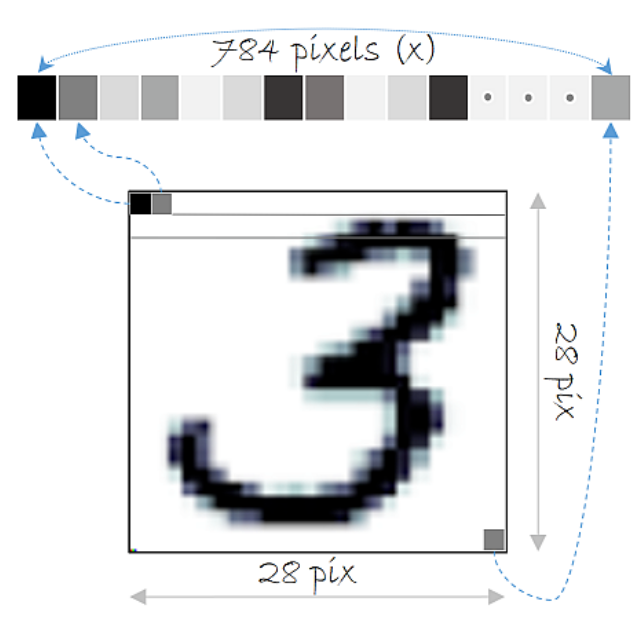

In [ ]:
# for X, Y in data_loader:
  # 입력 이미지를 [batch_size × 784]의 크기로 reshape
  # 레이블은 원-핫 인코딩
  # X = X.view(-1, 28*28)
  # view를 통해서 (배치 크기 × 784)의 크기로 변환

# 토치비전(torchvision)소개 

torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지

https://pytorch.org/docs/stable/torchvision/index.html

자연어 처리를 위해서는 토치텍스트(torchtext)라는 패키지

# 분류기 구현을 위한 사전 설정

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

현재 환경에서 GPU 가능한지 

In [ ]:
USE_CUDA = torch.cuda.is_available() 
# GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else"cpu")
# GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


랜덤 시드를 고정

In [ ]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

하이퍼파라미터를 변수로 둔다

In [ ]:
# hyperparameters  에포크와 배치 사이즈 
training_epochs =15
batch_size =100

# MNIST 분류기 구현하기

torchvision.datasets.dsets.MNIST를 사용하여 MNIST 데이터셋을 불러올 수 있다.

# 1. MNIST 데이터 셋 불러오기

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(
    root = 'MNIST_data/',
    train = True,
    transform = transforms.ToTensor(),
    download = True)

mnist_test = dsets.MNIST(
    root = 'MNIST_data/',
    train = False,
    transform=transforms.ToTensor(),
    download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로

두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴

세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환

네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미

# 2. 데이터로더(DataLodaer)를 사용

In [ ]:
# dataset loader
data_loader = DataLoader(
    dataset = mnist_train,
    batch_size = batch_size,
    shuffle=True,
    drop_last = True)

DataLoader에는 4개의 인자

첫번째 인자인 dataset은 로드할 대상을 의미

두번째 인자인 batch_size는 배치 크기

shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부,

drop_last는 마지막 배치를 버릴 것인지를 의미

drop_last를 하는 이유

1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이면

1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남는다.

이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있다. 

이때 마지막 배치를 버리려면 drop_last=True를 해주면 된다.

이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아준다.

# 3. 모델 설계

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias = True).to(device)

In [ ]:
# bias는 편향 b를 사용할 것인지 기본적으로는 True값

# 4. 비용 함수와 옵티마이저를 정의

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)  # 내부적으로 소프트맥스 함수를 표함
optimizer = torch.optim.SGD(linear.parameters(), lr =0.1)

In [ ]:
for epoch in range(training_epochs):
# 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X,Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 x는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원 핫 인코딩이 된 상태가 아니라 0 ~ 9 의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


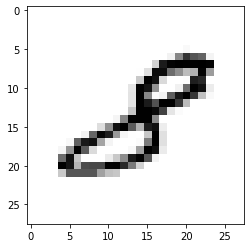

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()